In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [90]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("Data/Forest_and_Carbon.csv")
df.iloc[20:30]

print(df.columns.tolist())


['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']


In [91]:
df = df.drop(columns=['Source', 'ISO2', 'ISO3','CTS_Full_Descriptor', 'CTS_Name', 'CTS_Code'])

In [92]:
df

,ObjectId,Country,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,Advanced Economies,Carbon stocks in forests,Million tonnes,52618.660100,53177.699800,53393.568800,53609.438200,53825.307300,54041.176900,54257.046500,54472.915300,54755.427400,54931.224200,55107.021400,55282.818100,55458.615500,55634.412300,55562.628800,55727.584200,55892.539900,56057.495600,56222.450700,56445.550100,56668.648900,56891.748000,57114.846600,57337.946100,57568.174400,57777.849900,57959.762500,58035.051300,58102.552100,NaN,NaN
1,2,Advanced Economies,Forest area,1000 HA,945840.608900,950628.754500,950883.639900,951138.525500,951393.411100,951648.296500,951903.182100,952158.067500,953166.953100,953722.117000,954277.281100,954832.445100,955387.609200,955942.773200,953139.537200,953649.301300,954159.065300,954668.829400,955178.593400,956338.503600,957498.413800,958658.324000,959818.234200,960978.144400,962013.845500,961845.120000,961963.710000,962092.030000,962242.860000,962383.873400,962531.435600
2,3,Advanced Economies,Index of carbon stocks in forests,Index,100.000000,101.062436,101.472688,101.882941,102.293193,102.703446,103.113698,103.523950,104.060855,104.394951,104.729047,105.063143,105.397240,105.731336,105.594914,105.908406,106.221899,106.535392,106.848883,107.272876,107.696868,108.120860,108.544852,108.968845,109.406386,109.804867,110.150586,110.293670,110.421953,NaN,NaN
3,4,Advanced Economies,Index of forest extent,Index,100.000000,100.506232,100.533180,100.560128,100.587076,100.614024,100.640972,100.667920,100.774585,100.833281,100.891976,100.950671,101.009367,101.068062,100.771687,100.825582,100.879478,100.933373,100.987268,101.109901,101.232534,101.355167,101.477799,101.600432,101.709933,101.692094,101.704632,101.718199,101.734145,101.749054,101.764655
4,5,"Afghanistan, Islamic Rep. of",Forest area,1000 HA,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,1329,Zimbabwe,Forest area,1000 HA,18734.540000,18688.470000,18642.400000,18596.330000,18550.260000,18504.190000,18458.120000,18412.050000,18365.980000,18319.910000,18273.840000,18227.770000,18181.700000,18135.630000,18089.560000,18043.490000,17997.420000,17951.350000,17905.280000,17859.210000,17813.140000,17767.070000,17721.000000,17674.930000,17628.860000,17582.790000,17536.720000,17490.650000,17444.580000,17398.510000,17352.440000
1329,1330,Zimbabwe,Index of carbon stocks in forests,Index,100.000000,99.760326,99.520660,99.280986,99.041313,98.801639,98.561973,98.322299,98.082625,97.830540,97.578455,97.326369,97.074284,96.822199,96.570114,96.318029,96.065935,95.813850,95.561765,95.300952,95.040148,94.779335,94.518522,94.257709,94.190753,84.897751,84.675304,84.452857,84.215675,NaN,NaN
1330,1331,Zimbabwe,Index of forest extent,Index,100.000000,99.754091,99.508181,99.262272,99.016362,98.770453,98.524543,98.278634,98.032725,97.786815,97.540906,97.294996,97.049087,96.803177,96.557268,96.311359,96.065449,95.819540,95.573630,95.327721,95.081811,94.835902,94.589993,94.344083,94.098174,93.852264,93.606355,93.360445,93.114536,92.868627,92.622717
1331,1332,Zimbabwe,Land area,1000 HA,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.000000,38685.0

In [93]:
forest_areas = df[df["Indicator"] == "Forest area"]
forest_areas.head()

,ObjectId,Country,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
1,2,Advanced Economies,Forest area,1000 HA,945840.6089,950628.7545,950883.6399,951138.5255,951393.4111,951648.2965,951903.1821,952158.0675,953166.9531,953722.1170,954277.2811,954832.4451,955387.6092,955942.7732,953139.5372,953649.3013,954159.0653,954668.8294,955178.5934,956338.5036,957498.4138,958658.3240,959818.2342,960978.1444,962013.8455,961845.1200,961963.710,962092.03,962242.86,962383.8734,962531.4356
4,5,"Afghanistan, Islamic Rep. of",Forest area,1000 HA,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.440,1208.44,1208.44,1208.4400,1208.4400
9,10,Africa,Forest area,1000 HA,685614.0711,702769.4832,699668.6553,696567.8275,693466.9996,690366.1717,687265.3438,684164.5159,681063.6880,677834.8392,674605.9904,671377.1416,668148.2928,664919.4440,661690.5952,658461.7464,655232.8976,652004.0488,648775.2000,645042.8380,668200.1500,664293.5400,660386.9300,656480.3200,652479.3843,648546.9900,644616.828,640606.55,636636.97,632640.2579,628661.6339
12,13,Albania,Forest area,1000 HA,784.9000,782.9500,781.0000,779.0500,777.1000,775.1500,773.2000,771.2500,769.3000,770.5770,771.8540,773.1310,774.4080,775.6850,776.9620,778.2390,779.5160,780.7930,782.0700,783.4935,784.9170,786.3405,787.7640,789.1875,789.1800,788.9025,788.900,788.90,788.90,788.9000,788.9000
17,18,Algeria,Forest area,1000 HA,1649.4000,1640.6000,1631.8000,1623.0000,1614.2000,1605.4000,1596.6000,1587.8000,1579.0000,1612.9000,1646.8000,1680.7000,1714.6000,1748.5000,1782.4000,1816.3000,1850.2000,1884.1000,1918.0000,1925.6000,1933.2000,1940.8000,1948.4000,1956.0000,1956.0000,1943.0000,1930.000,1939.00,1949.00,1958.3333,1968.1111


In [94]:
forest_areas_long = forest_areas.melt(
                    id_vars = ['Country'],
                    value_vars = [col for col in forest_areas.columns if col.startswith('F')],
                    var_name = 'Year',
                    value_name = 'Forest Areas')
forest_areas_long['Year'] = forest_areas_long['Year'].str[1:].astype(int)

In [95]:
forest_areas_long.head()

,Country,Year,Forest Areas
0,Advanced Economies,1992,945840.6089
1,"Afghanistan, Islamic Rep. of",1992,1208.4400
2,Africa,1992,685614.0711
3,Albania,1992,784.9000
4,Algeria,1992,1649.4000


In [104]:
countries_1992 = forest_areas_long[forest_areas_long['Year'] == 1992]

countries = countries_1992.sort_values('Forest Areas', ascending=False)
countries = countries['Country'].iloc[25:40]
print(countries)

226    Venezuela, Rep. Bolivariana de
233                            Zambia
143               Mozambique, Rep. of
144                           Myanmar
164                  Papua New Guinea
11                          Argentina
202                            Sweden
153                           Nigeria
165                          Paraguay
107                             Japan
79                              Gabon
42               Central African Rep.
39                           Cameroon
200                             Sudan
50                     Congo, Rep. of
Name: Country, dtype: object


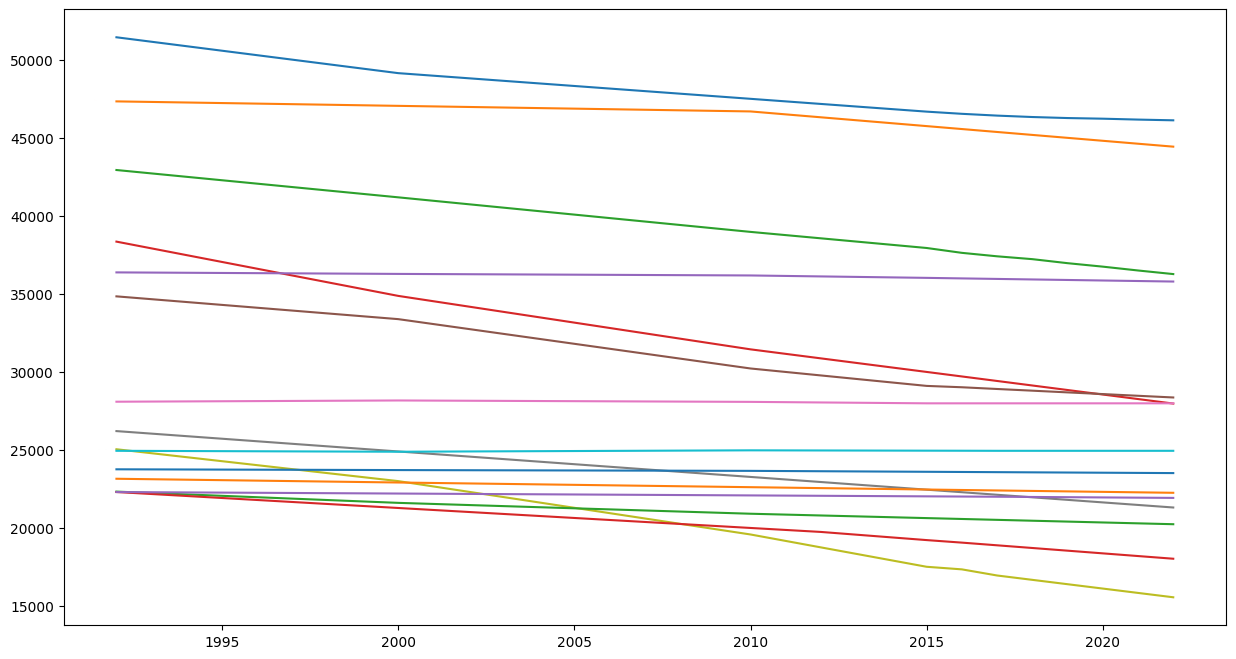

In [115]:
plt.figure(figsize=(15,8))
for country in countries :
    country_data = forest_areas_long[forest_areas_long['Country'] == country]
    plt.plot(country_data['Year'], country_data['Forest Areas'], label = country)